
# Page View Time Series Visualizer 
### (continuous data)

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\Bio Guest\Documents\Datasets\Unrelated\fcc-forum-pageviews.csv",parse_dates=['date']).set_index('date')

In [3]:
df.shape 

(1304, 1)

In [4]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [5]:
df.sort_values(by='value',ascending=False)

,value
date,
2019-06-17,1173655
2019-06-18,1166225
2019-08-07,341595
2019-08-06,337325
2019-11-15,314101
...,...
2016-05-15,2927
2016-05-16,2591
2016-05-10,2329


In [6]:
df = df.loc[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))] 

In [7]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### line plot 

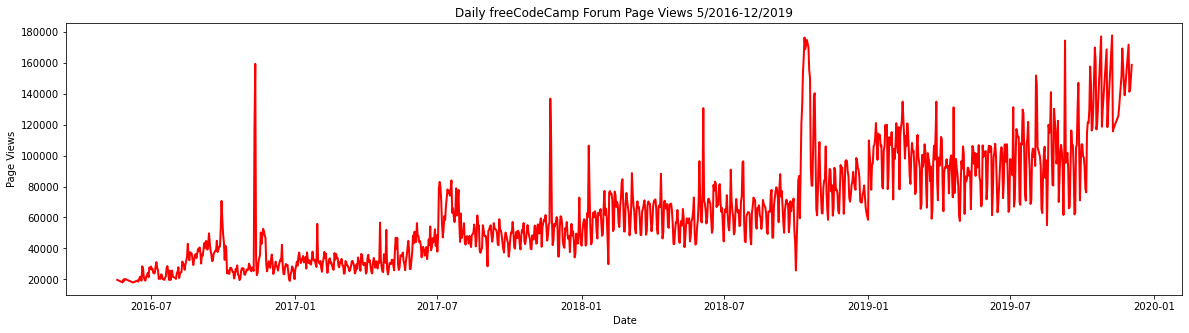

In [8]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(df, c= 'r', lw=2)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.xticks(['2016-07-01','2017-01-01','2017-07-01','2018-01-01','2018-07-01','2019-01-01','2019-07-01','2020-01-01'],['2016-07','2017-01','2017-07','2018-01','2018-07','2019-01','2019-07','2020-01'])
plt.show()

In [9]:
df.loc['2016-07-01']

value    28372
Name: 2016-07-01 00:00:00, dtype: int64

### bar plot

In [10]:
dff=df.reset_index()

In [11]:
# df.groupby(pd.Grouper(key='date', axis=0, freq='M')).sum()
dff=dff.groupby([dff['date'].dt.year, dff['date'].dt.month_name()]).mean()

In [12]:
dff.index.rename(['Years','Months'],inplace=True)

In [13]:
dff.reset_index(inplace=True)

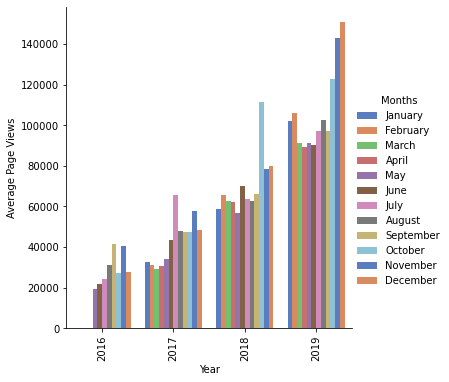

In [14]:
hue_order=['January','February','March','April','May','June','July','August','September','October','November','December']
fig=sns.catplot(x='Years',y='value',hue='Months',hue_order=hue_order,data=dff, kind='bar', palette= 'muted').set_axis_labels("Year","Average Page Views")
fig.set_xticklabels(rotation=90)

In [15]:
# to display legend in the top left corner (part of the graph)
# plt.legend(title="Months", loc="upper left", labels=hue_order) --- ensure catplot argument includes legend=False 

### box plot 

In [16]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]
df_box.rename(columns={'value': 'Page Views'}, inplace=True)

[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

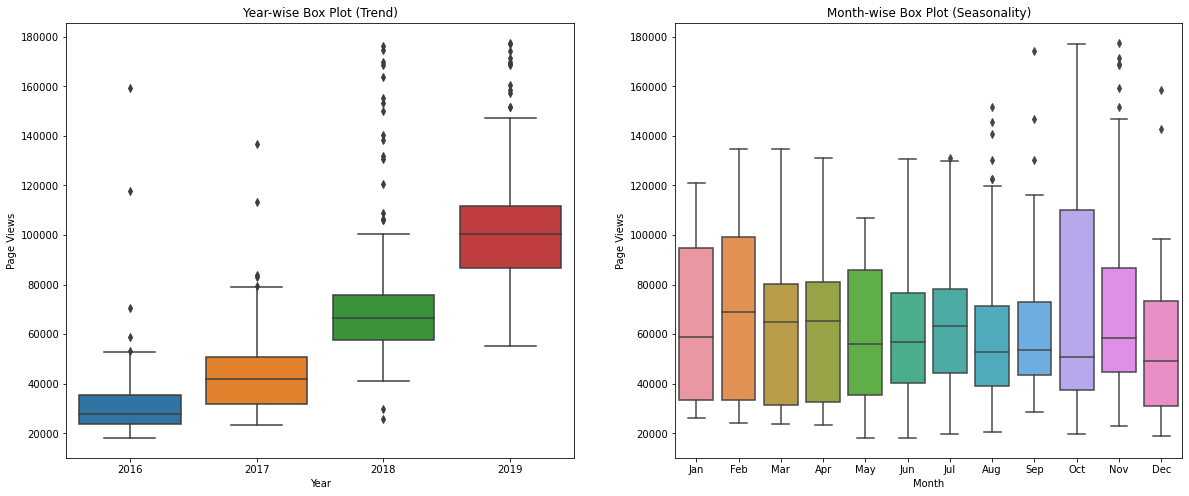

In [17]:
fig,axes=plt.subplots(1,2, figsize=(20, 8))
sns.boxplot(y='Page Views',x='Year',data=df_box,orient='v',ax=axes[0]).set(title='Year-wise Box Plot (Trend)')
sns.boxplot(y='Page Views',x='Month', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],data=df_box,orient='v',ax=axes[1]).set(title='Month-wise Box Plot (Seasonality)')


# Sea Level Predictor 

In [18]:
from scipy import stats
from scipy.stats import linregress

In [19]:
da= pd.read_csv(r"C:\Users\Bio Guest\Documents\Datasets\Unrelated\epa-sea-level.csv", float_precision="legacy")

In [20]:
da.shape

(134, 5)

In [21]:
da.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


In [22]:
da.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


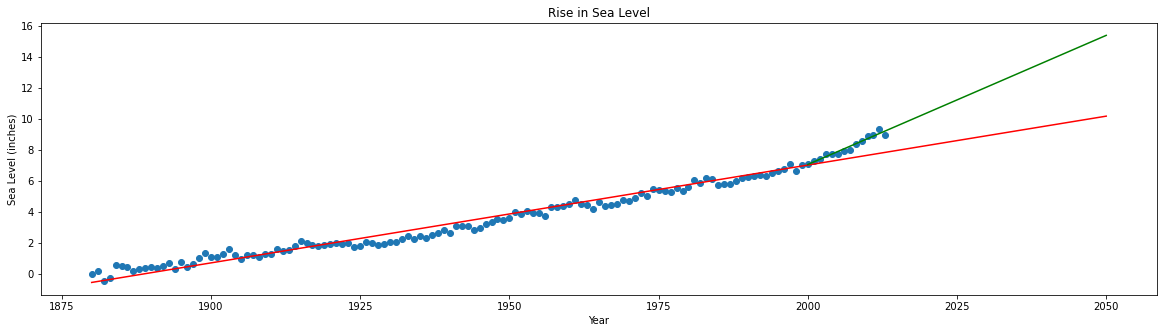

In [45]:
x=da['Year']
y=da['CSIRO Adjusted Sea Level']
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(x,y)
plt.xticks(np.arange(1850, 2080, 25))
ax.set(xlabel="Year",ylabel="Sea Level (inches)", title= "Rise in Sea Level")
plt.plot(ye, line, 'r', label='fitted line')
plt.plot(ys, sline, 'g', label='fitted line')

In [43]:
#range of years (from 1880) including forecast
ye = pd.Series(np.arange(1880, 2051, 1)) 
res = stats.linregress(x, y) #calling the linear regression function 
line = [res.slope*x + res.intercept for x in ye] #line of best fit including forecast

In [44]:
#line of best fit for range of years (starting from 2000) including forecast
ys= pd.Series(np.arange(2000, 2051, 1))
w=da['Year'][120:]
z=da['CSIRO Adjusted Sea Level'][120:]
rres= stats.linregress(w, z)
sline = [rres.slope*w + rres.intercept for w in ys]

In [41]:
#alternative solutions found: https://letientai.io/freecodecamp/#data-analysis-with-python